In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/engine-health/task.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
sns.set_style("whitegrid")

In [4]:
df_orig = pd.read_csv('/kaggle/input/engine-health/task.csv')
df = df_orig.copy()

In [5]:
df.head()

,timestamp,value,engine_id
0,2010-01-01 00:15:00,28.277262,0
1,2010-01-01 00:30:00,28.277262,0
2,2010-01-01 00:45:00,28.277262,0
3,2010-01-01 01:00:00,28.277262,0
4,2010-01-01 01:15:00,28.277262,0


#### Checking for Null Values:

In [6]:
df.isnull().sum()

timestamp    0
value        0
engine_id    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383187 entries, 0 to 383186
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  383187 non-null  object 
 1   value      383187 non-null  float64
 2   engine_id  383187 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 8.8+ MB


In [8]:
# Converting timestamp from object dtype to datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
# Setting the timestamp as index
df.set_index('timestamp',inplace=True)

#### Visualising the data

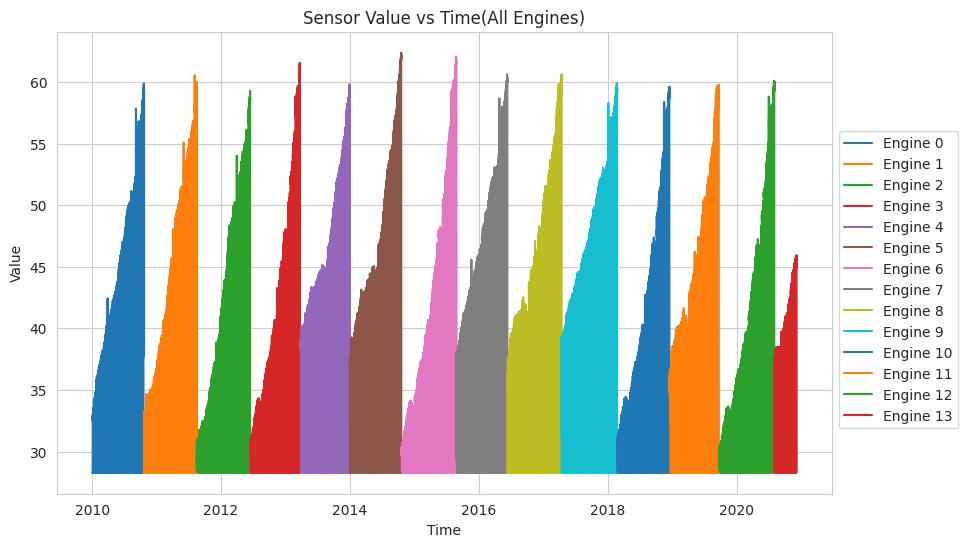

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Iterating through unique engine_id values and ploting values
for engine_id, data in df.groupby('engine_id'):
    ax.plot(data.index, data['value'], label=f'Engine {engine_id}')

# Adding x and y axis labels
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Sensor Value vs Time(All Engines)')
# Adding a legend
ax.legend(bbox_to_anchor = (1,0.8))


#### Individual Engine Plots

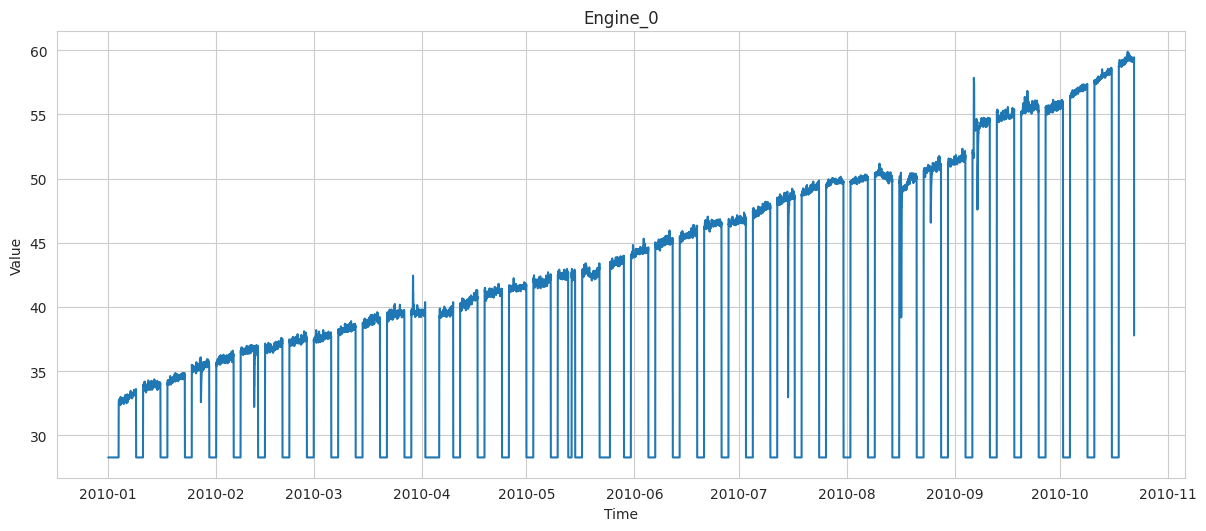

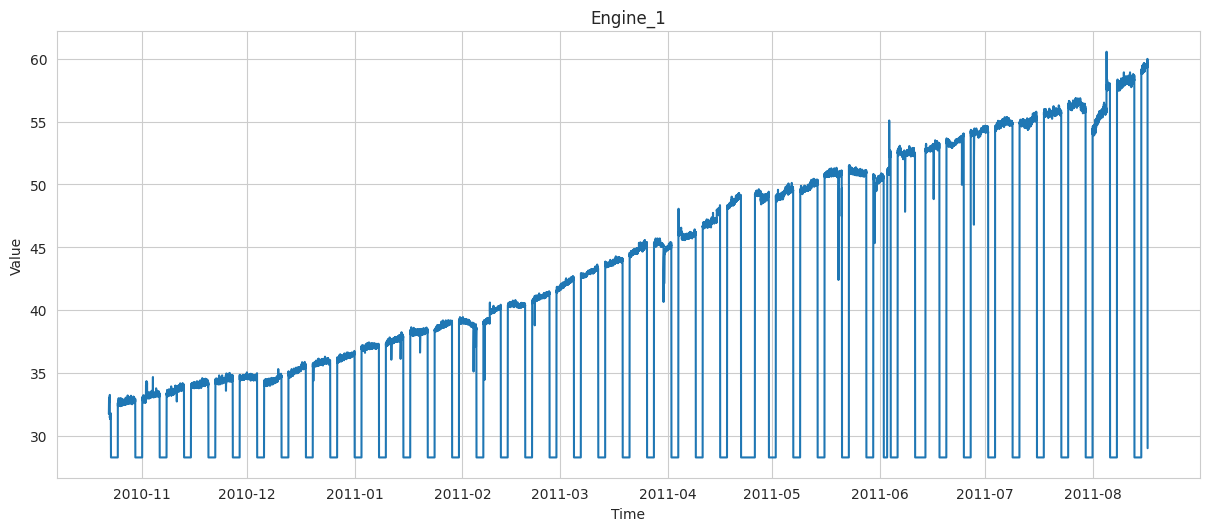

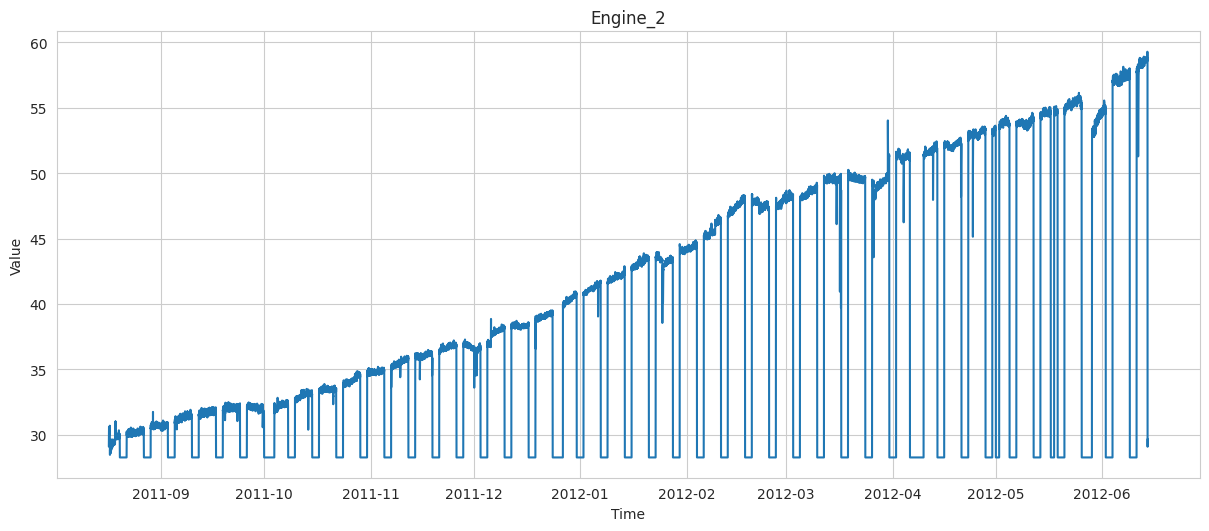

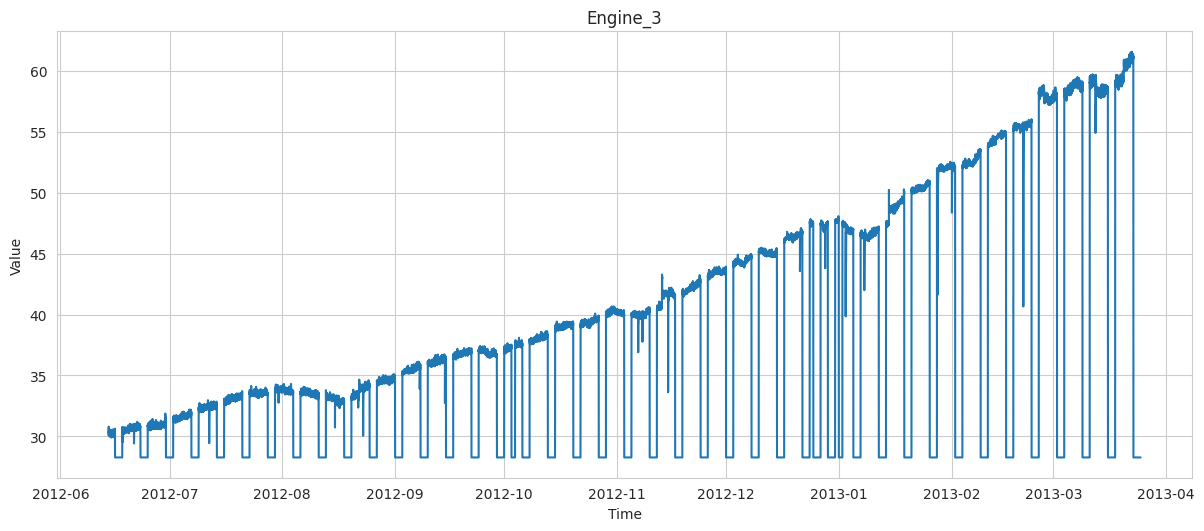

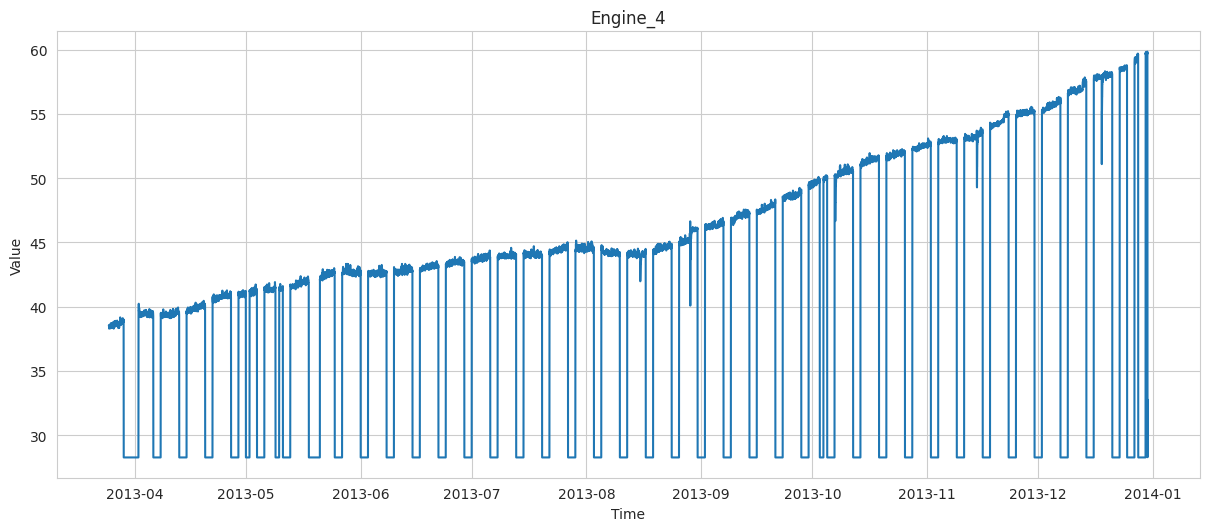

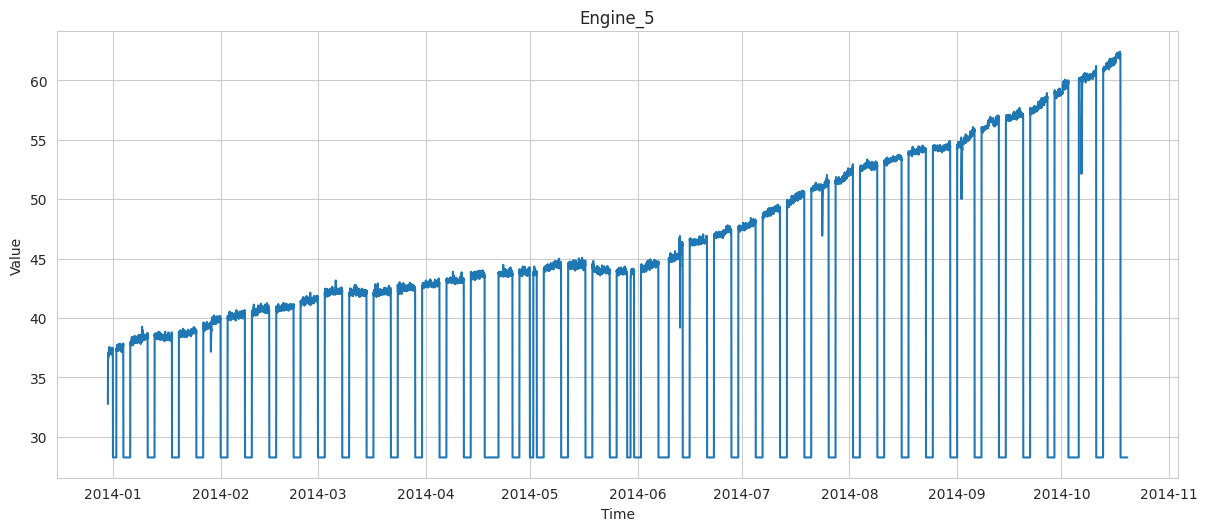

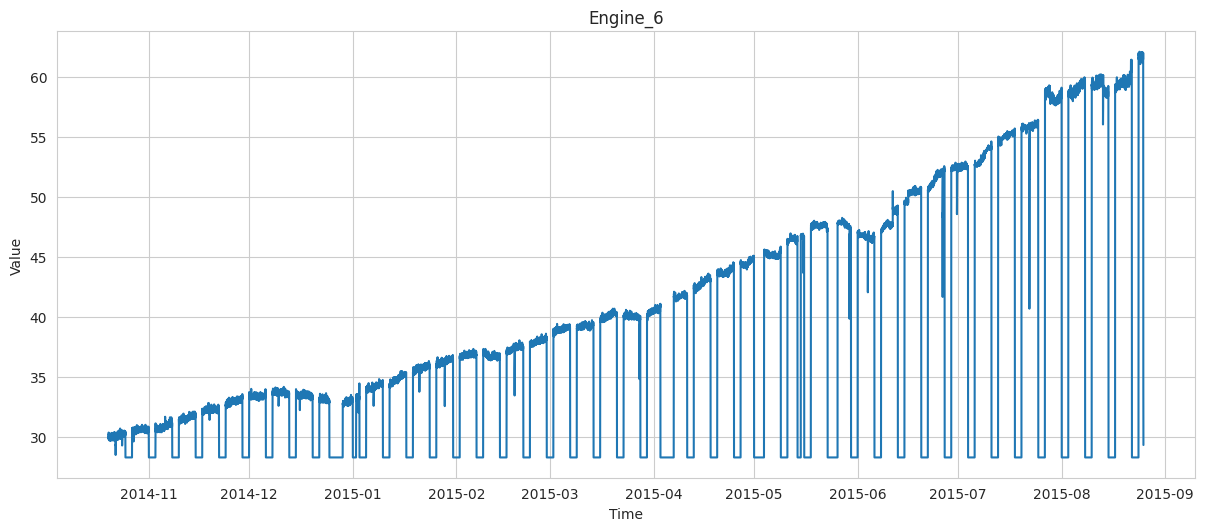

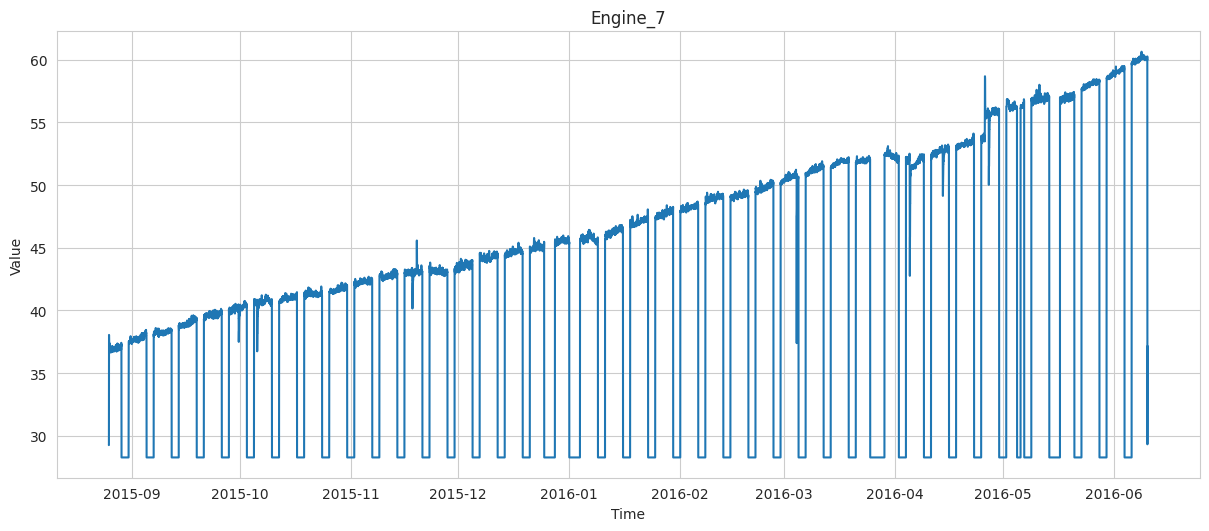

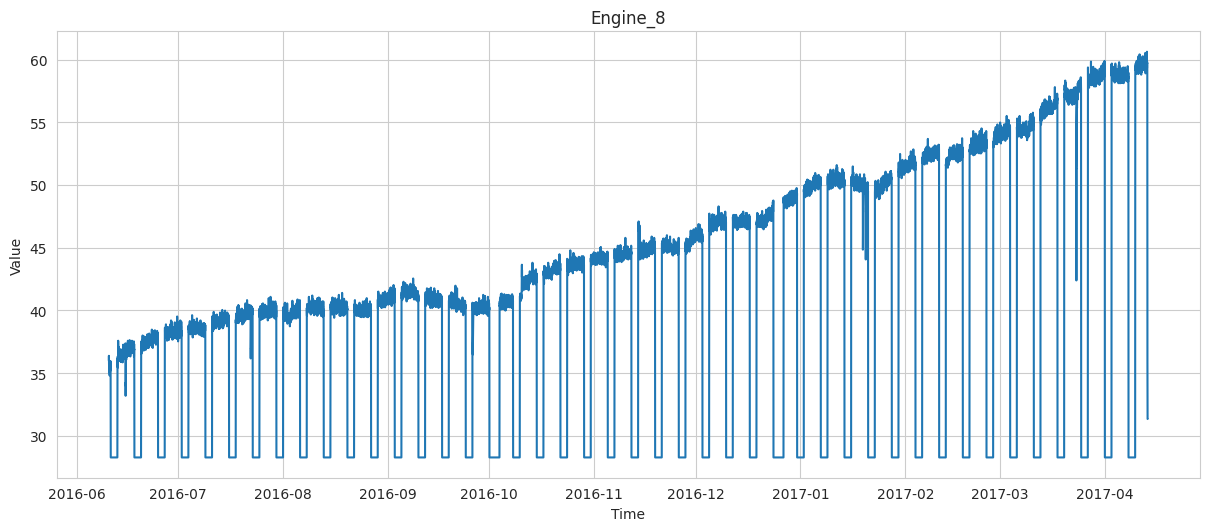

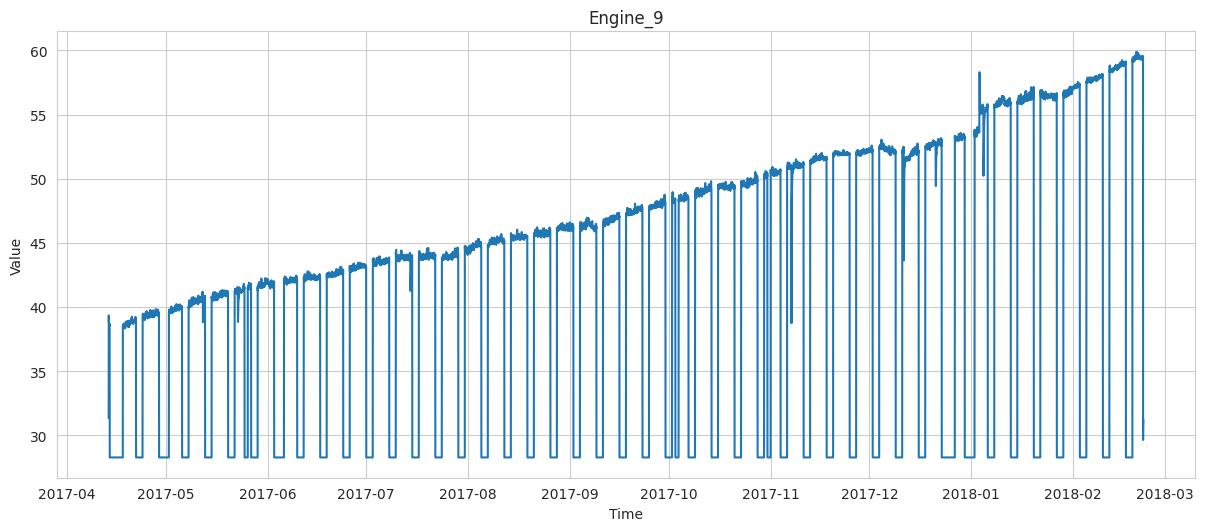

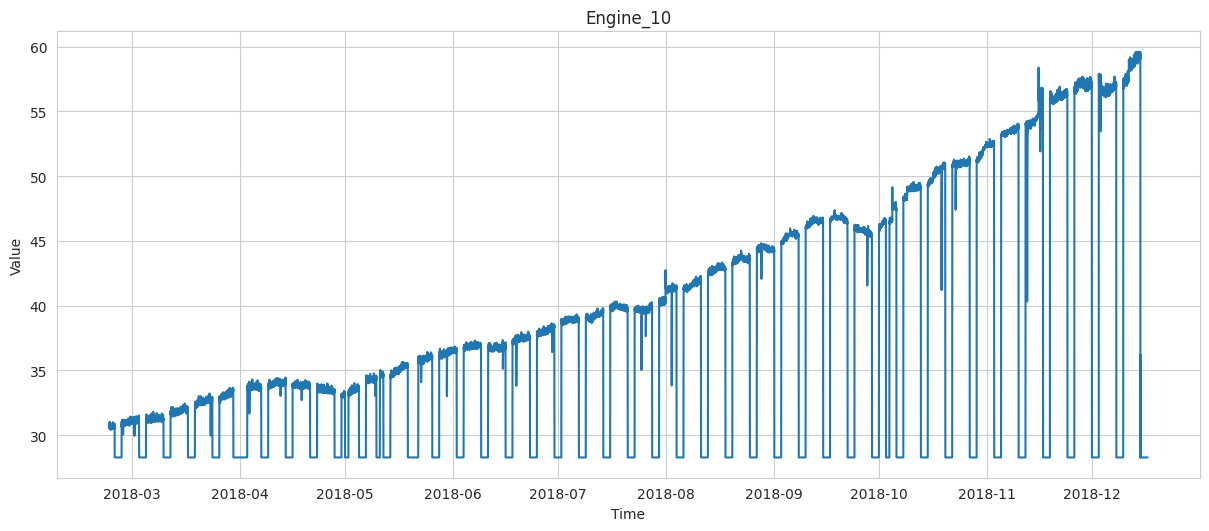

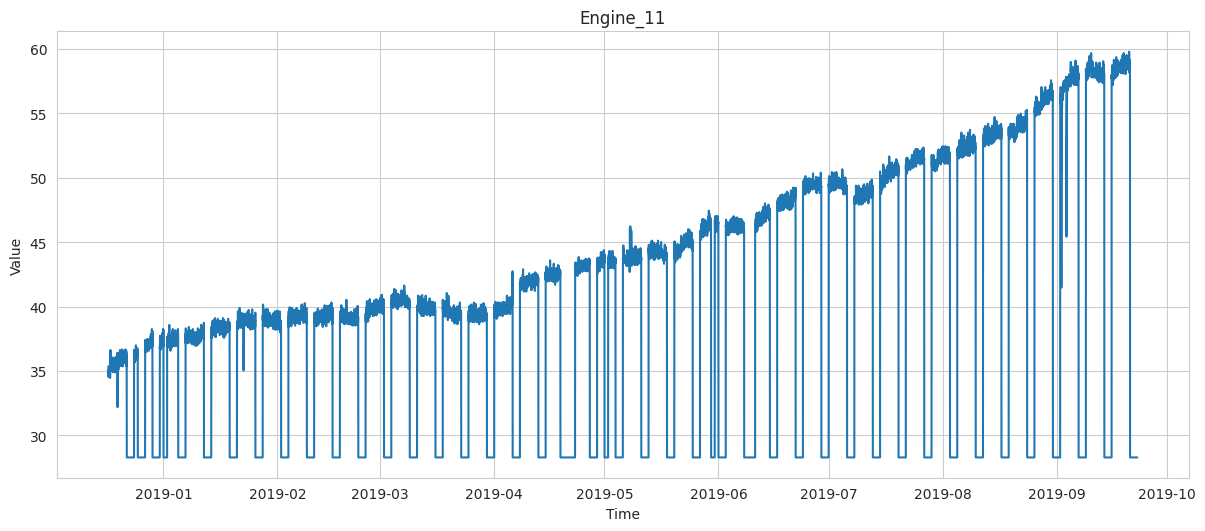

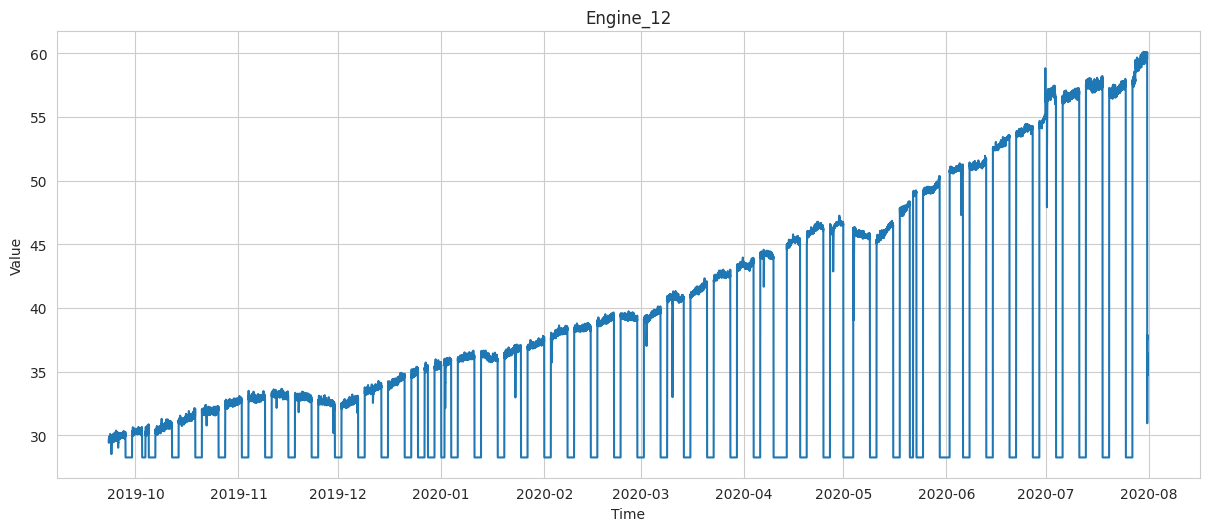

In [11]:
for i in range(13):
    plt.figure(figsize=(12,5))
    plt.plot(df[df['engine_id']==i].index,df[df['engine_id']==i]['value'],label = f'Engine_{i}')
    plt.tight_layout()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Engine_{i}')

#### Statistical Analysis

In [12]:
engine_stats = df.groupby('engine_id').describe()
engine_stats.drop(13,axis=0,inplace=True)
engine_stats

value                                                         \
             count       mean        std        min        25%        50%   
engine_id                                                                   
0          28263.0  39.776309   9.677617  28.277262  28.277262  39.388837   
1          28647.0  39.526622   9.977359  28.277262  28.277262  37.670880   
2          29030.0  38.123608   9.683023  28.277262  28.277262  35.226801   
3          27243.0  37.931745   9.726272  28.277262  28.277262  34.680074   
4          26934.0  40.962393   9.718612  28.277262  28.277262  42.854782   
5          28170.0  41.225303  10.281466  28.277262  28.277262  42.323468   
6          29710.0  37.923290   9.910869  28.277262  28.277262  34.635842   
7          27839.0  41.538618  10.190573  28.277262  28.277262  42.767853   
8          29493.0  40.763111   9.701340  28.277262  28.277262  40.560517   
9          30207.0  41.731453  10.296798  28.277262  28.277262  43.727380   
10         28575.0  37.720443   9.256897  28.277262  28.277262  35.294697   
11         26880.0  39.856971   9.530667  28.277262  28.277262  39.468369   
12         30008.0  37.303313   9.352510  28.277262  28.277262  33.892765   

                                 
                 75%        max  
engine_id                        
0          48.051838  59.883521  
1          49.112000  60.553119  
2          47.606553  59.282910  
3          44.892340  61.554459  
4          47.599582  59.836174  
5          48.604073  62.387192  
6          45.075545  62.075979  
7          49.771529  60.641033  
8          48.450650  60.625491  
9          50.158696  59.902769  
10         44.551418  59.612470  
11         47.544970  59.791842  
12         44.077264  60.113881

In [13]:
# Average number of days per engine before replacing it
print('** Before downsampling **')
print('--------------------------')
print("Average No. of days before replacing each engine:",(engine_stats['value','count'].mean())/(4*24))
print("Mean of Maximum values:",(engine_stats['value','max'].mean()))

** Before downsampling **
--------------------------
Average No. of days before replacing each engine: 297.2748397435898
Mean of Maximum values: 60.48160311468003


#### Downsampling to daily

In [14]:
df_daily = df[3::4*24]
df_daily.head(5)

,value,engine_id
timestamp,,
2010-01-01 01:00:00,28.277262,0
2010-01-02 01:00:00,28.277262,0
2010-01-03 01:00:00,28.277262,0
2010-01-04 01:00:00,32.644487,0
2010-01-05 01:00:00,32.644487,0


In [15]:
df.shape,df_daily.shape

((383187, 2), (3992, 2))

In [16]:
engine_daily_stats = df_daily.groupby('engine_id').describe()
engine_daily_stats.drop(13,axis=0,inplace=True)
# Average number of days per engine before replacing it
print('** After downsampling **')
print('-------------------------')
print(f"Average No. of days each engine: {((engine_daily_stats['value','count'].mean())):.2f}")
print(f"Mean of Maximum values: {(engine_daily_stats['value','max'].mean()):.2f}")

** After downsampling **
-------------------------
Average No. of days each engine: 297.31
Mean of Maximum values: 59.99


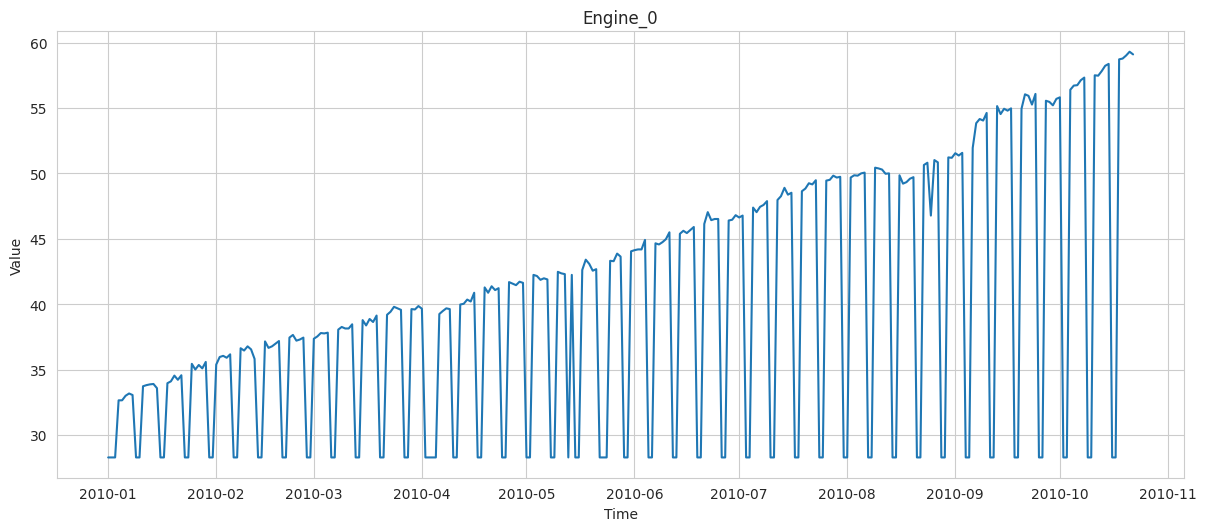

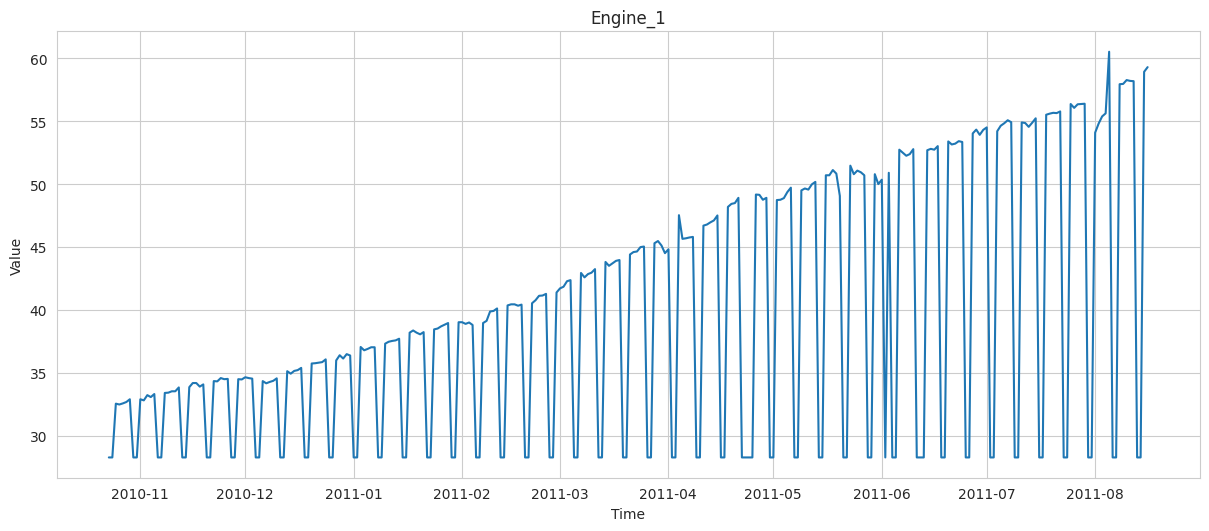

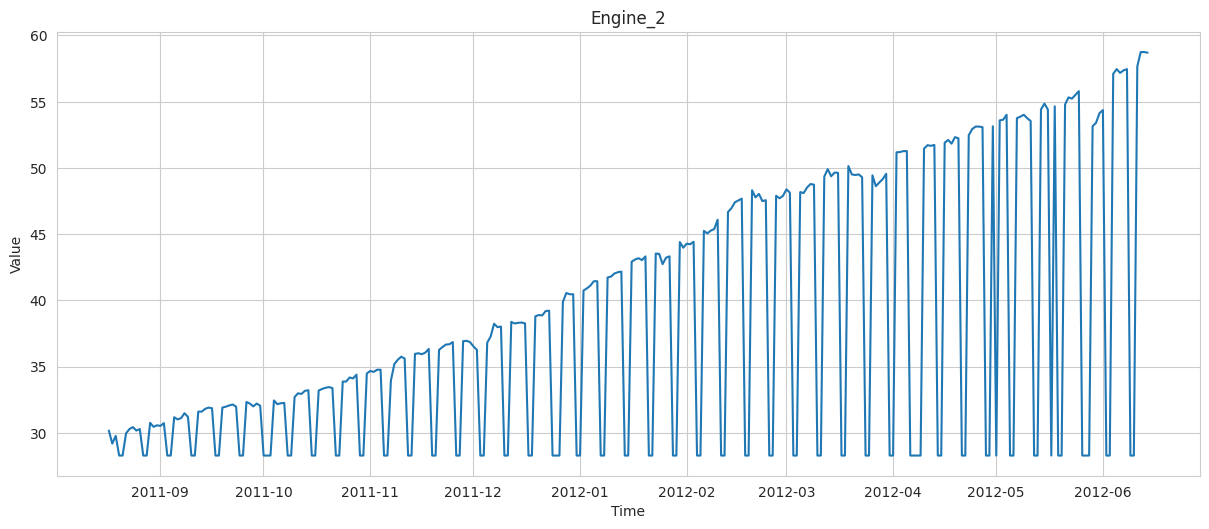

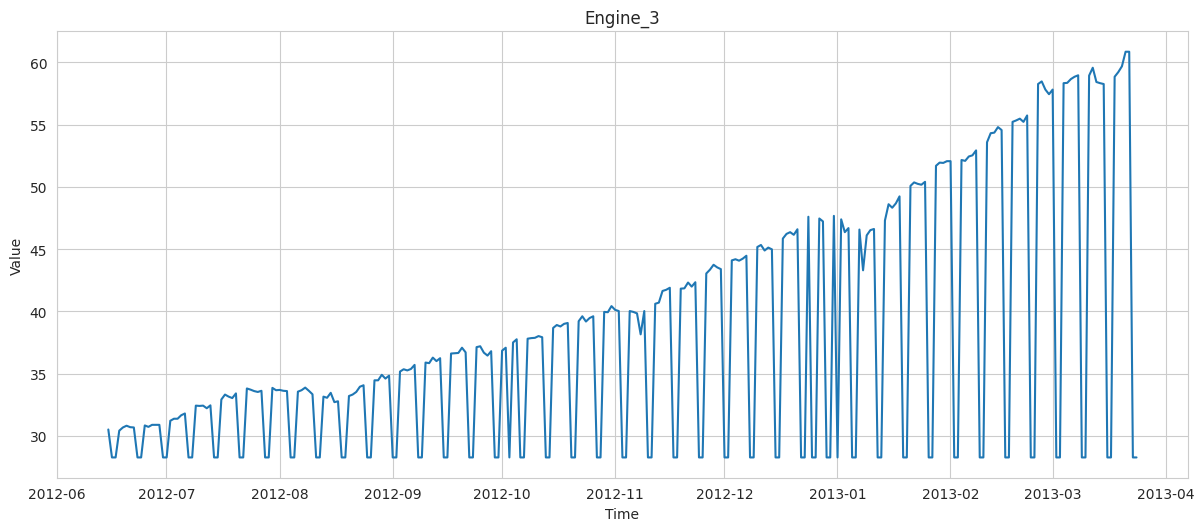

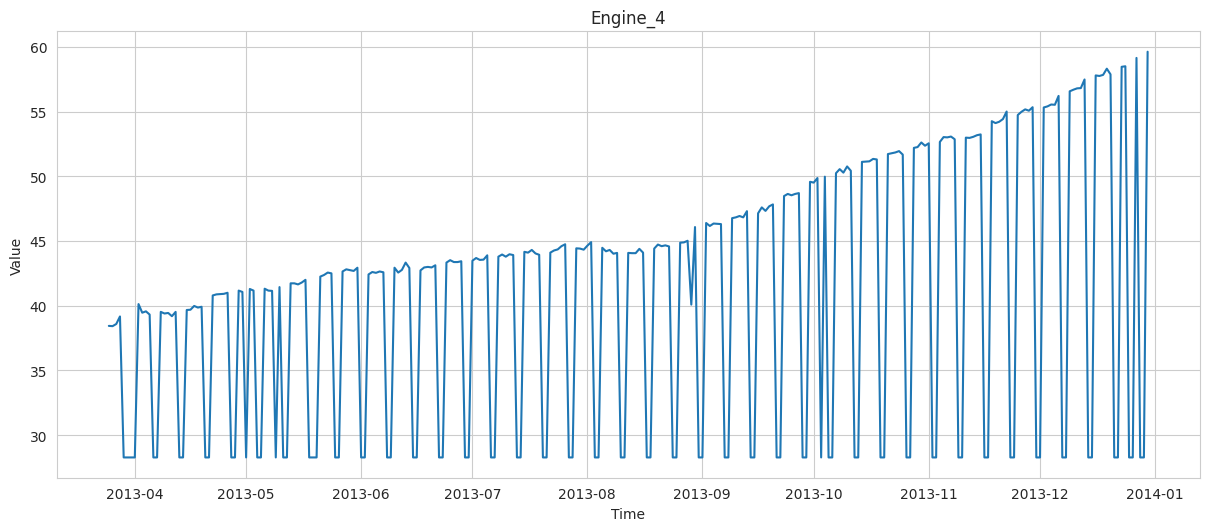

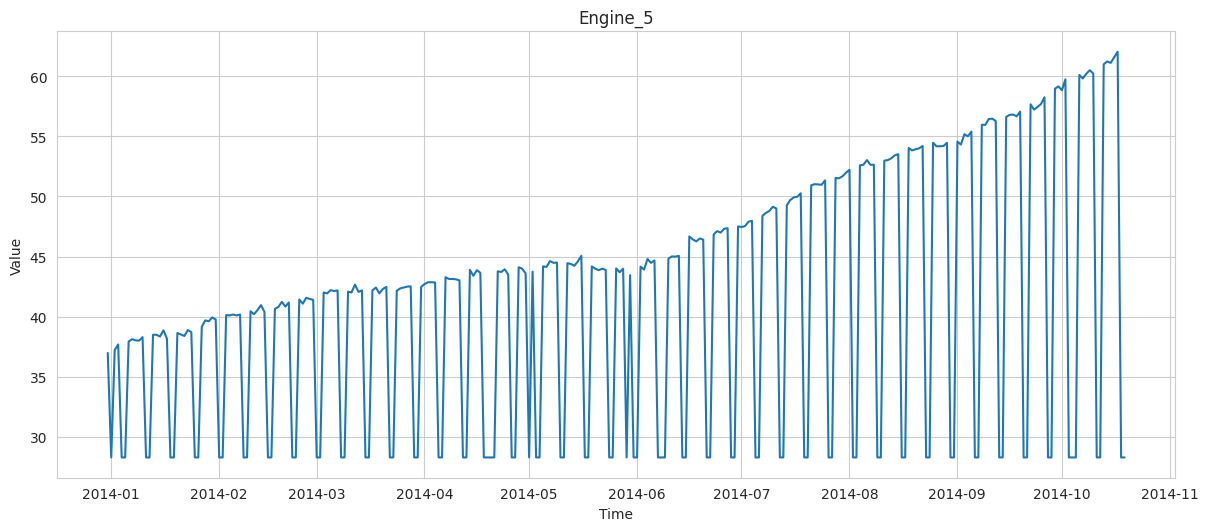

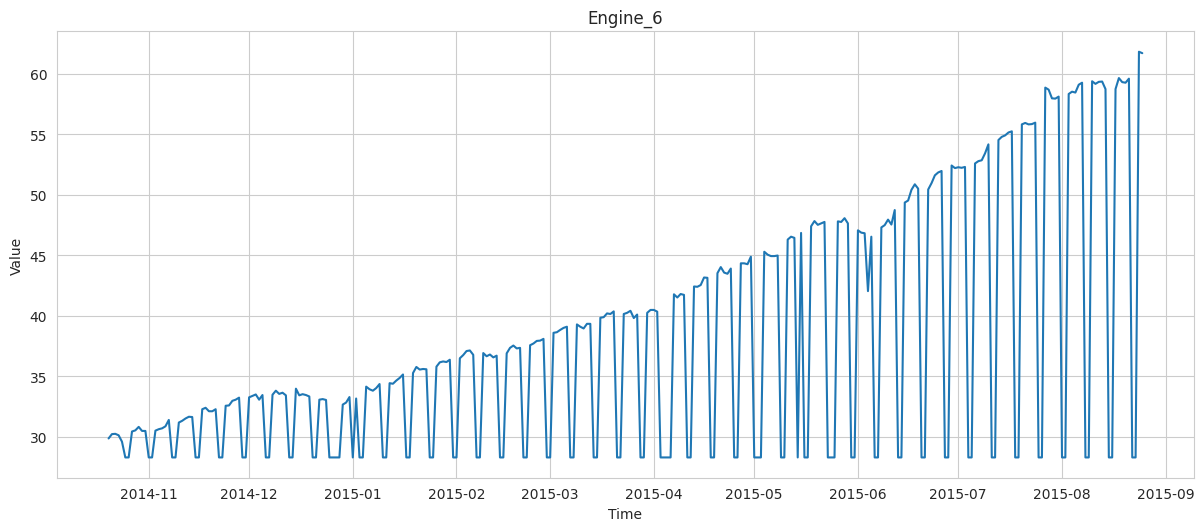

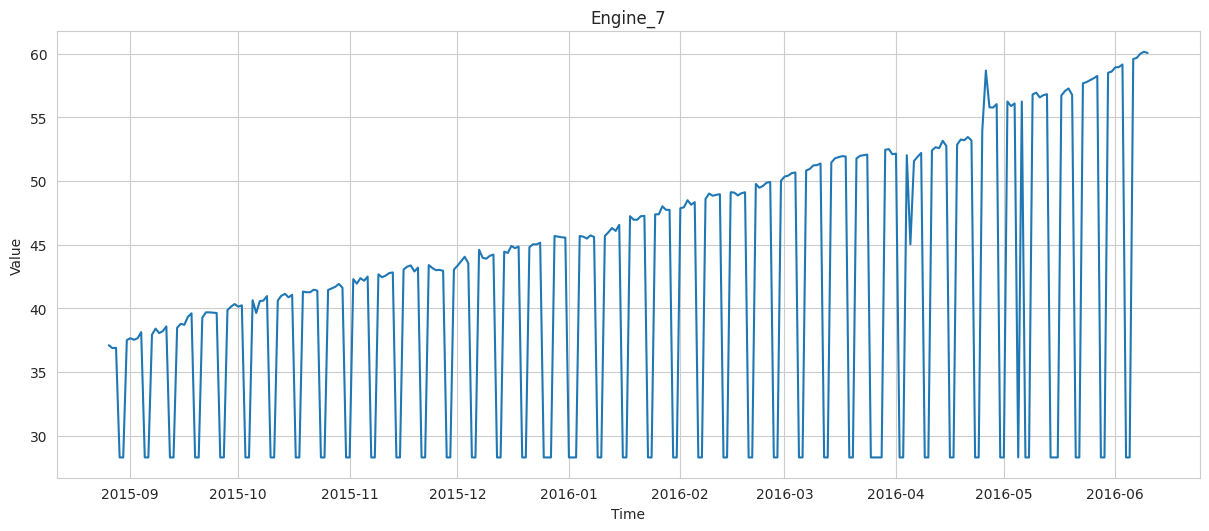

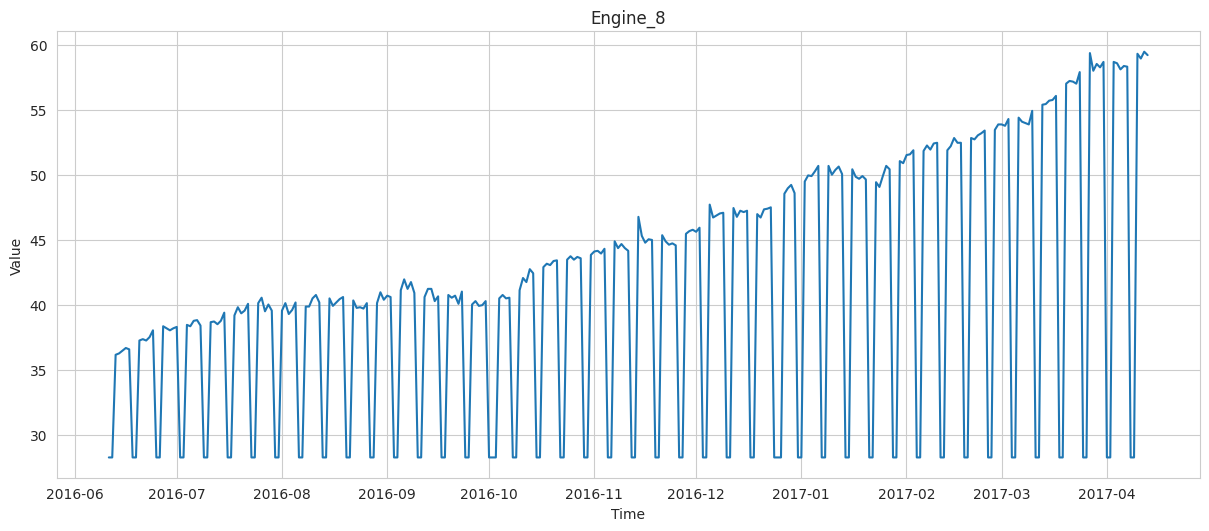

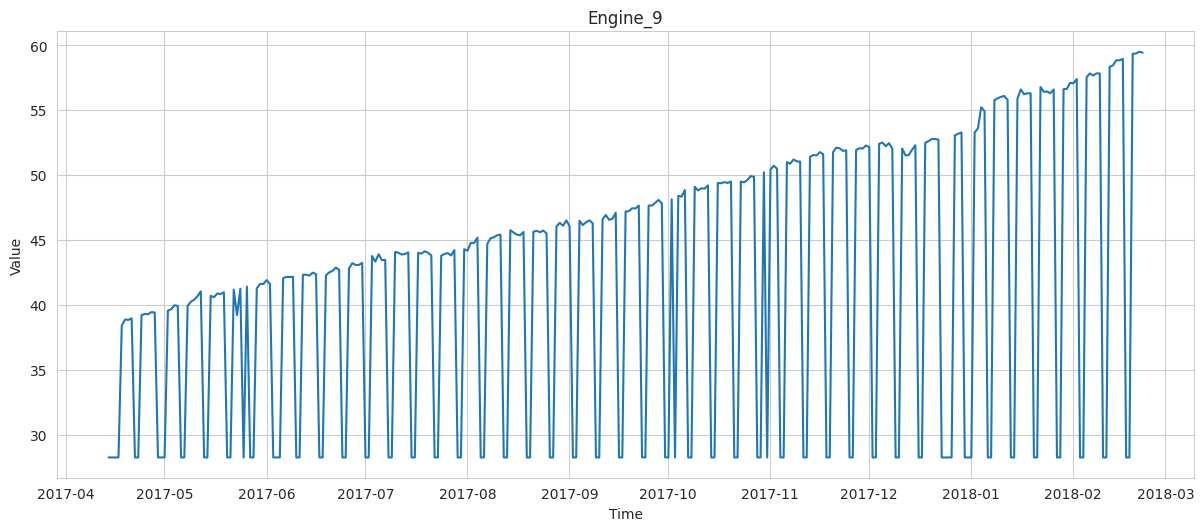

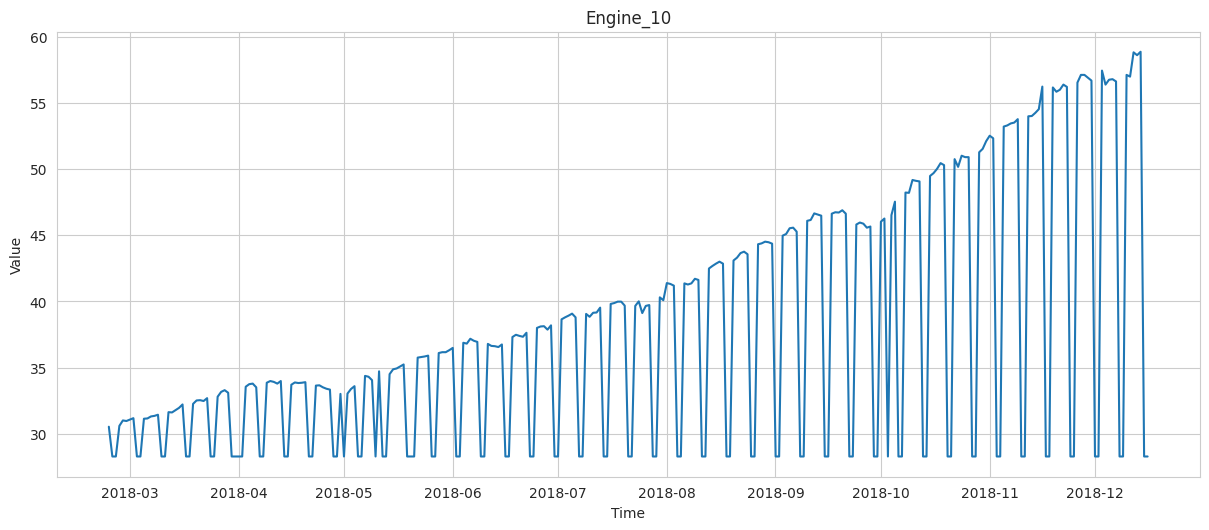

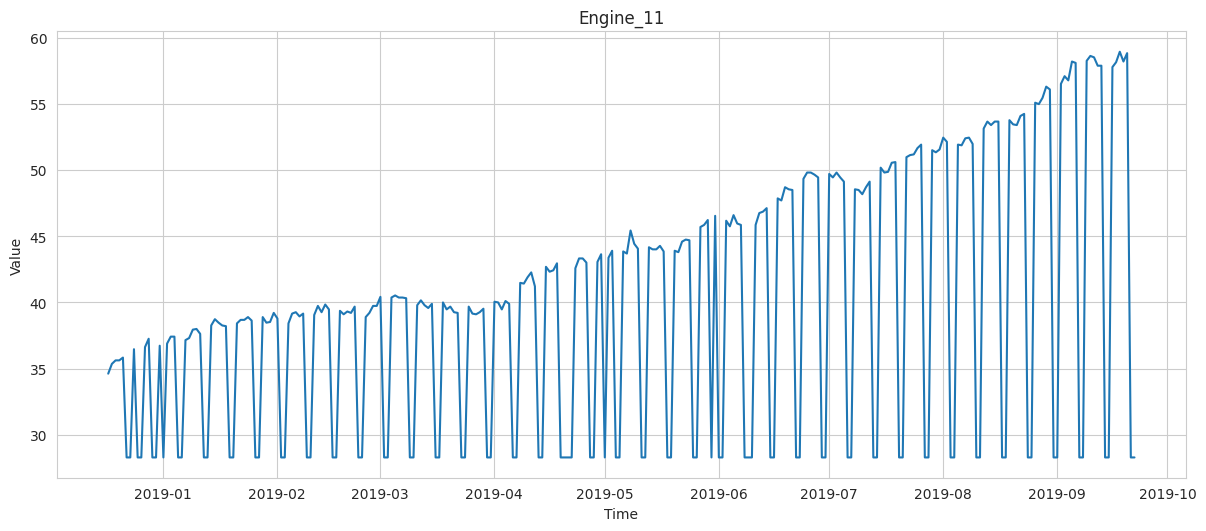

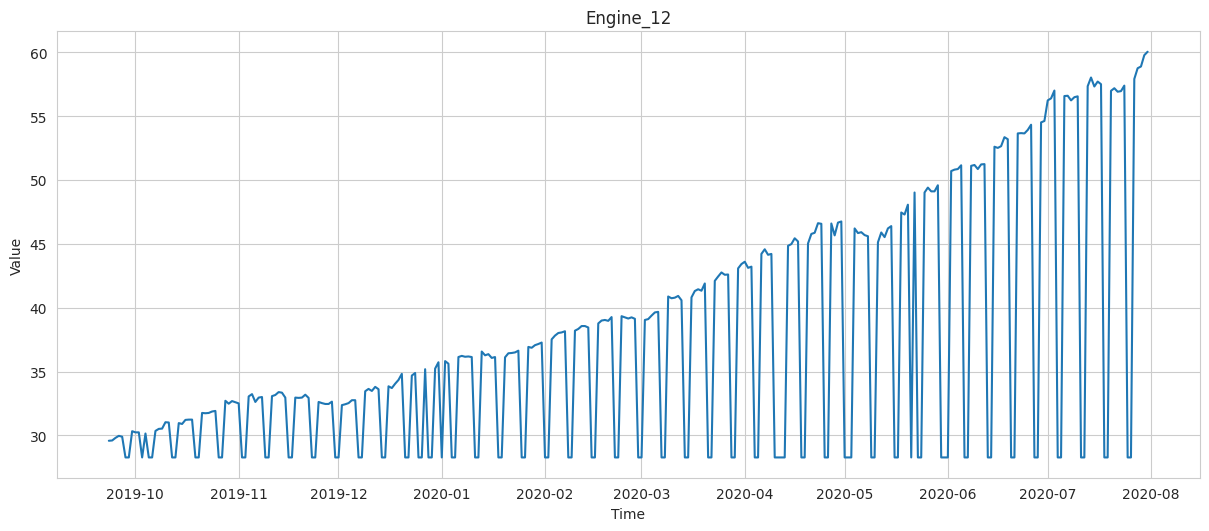

In [17]:
for i in range(13):
    plt.figure(figsize=(12,5))
    plt.plot(df_daily[df_daily['engine_id']==i].index,df_daily[df_daily['engine_id']==i]['value'],label = f'Engine_{i}')
    plt.tight_layout()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Engine_{i}')

##### As we are sure that the engine goes to min value during weekend, we will filter those values and only look at weekdays

In [18]:
#Applying median(5) filter to remove sudden variation/outliers
from scipy.signal import medfilt
df_daily['filtered_value'] = medfilt(df_daily['value'],kernel_size=5)

Plots after applying median filter


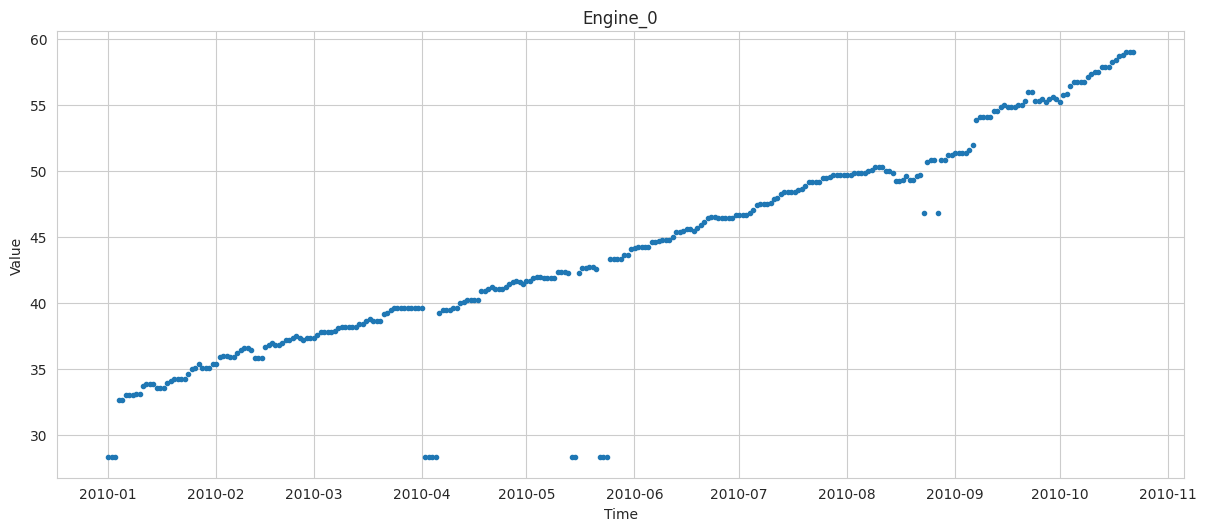

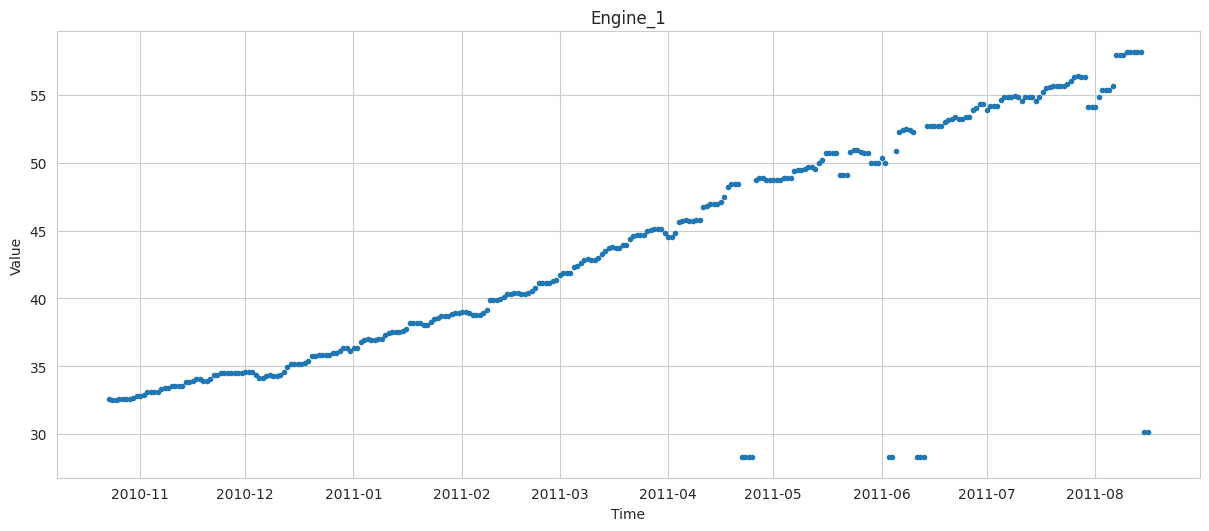

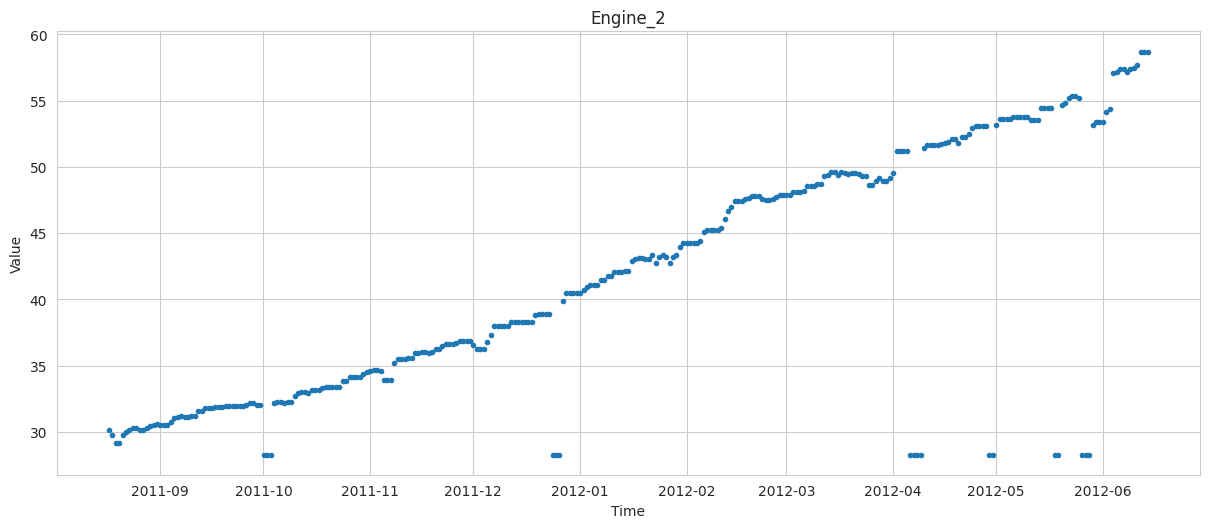

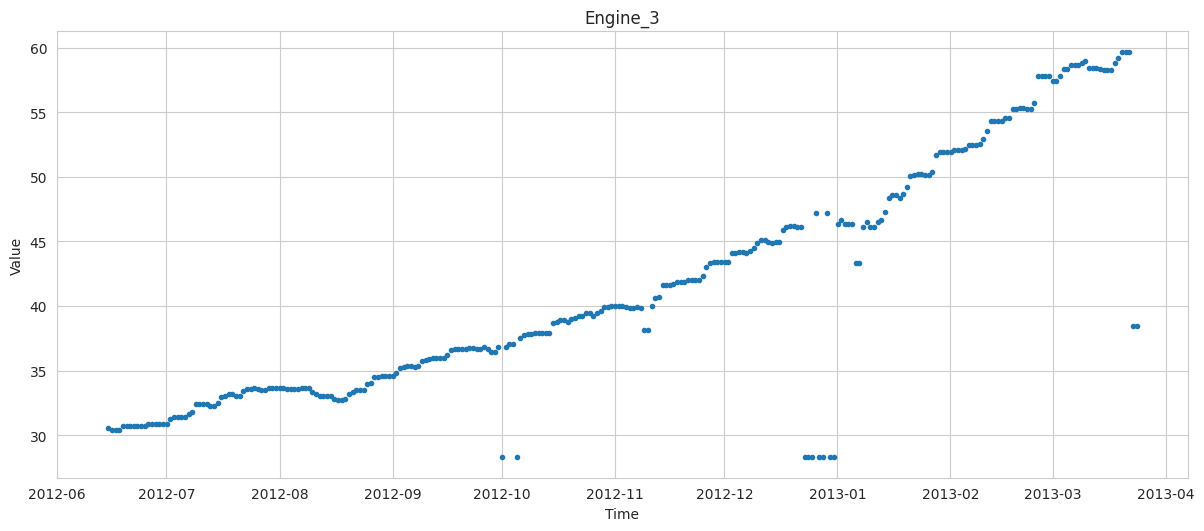

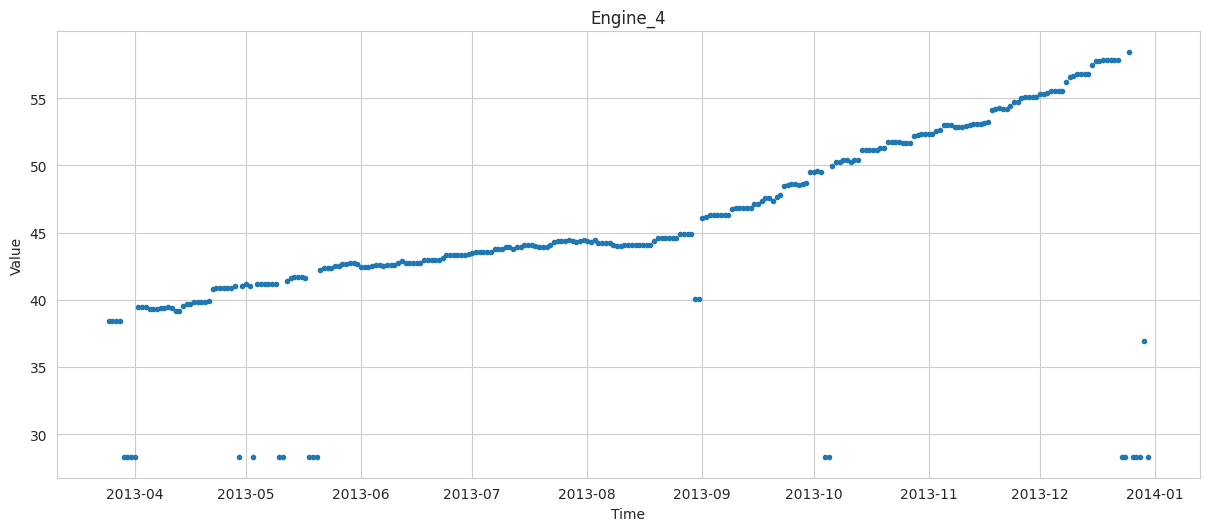

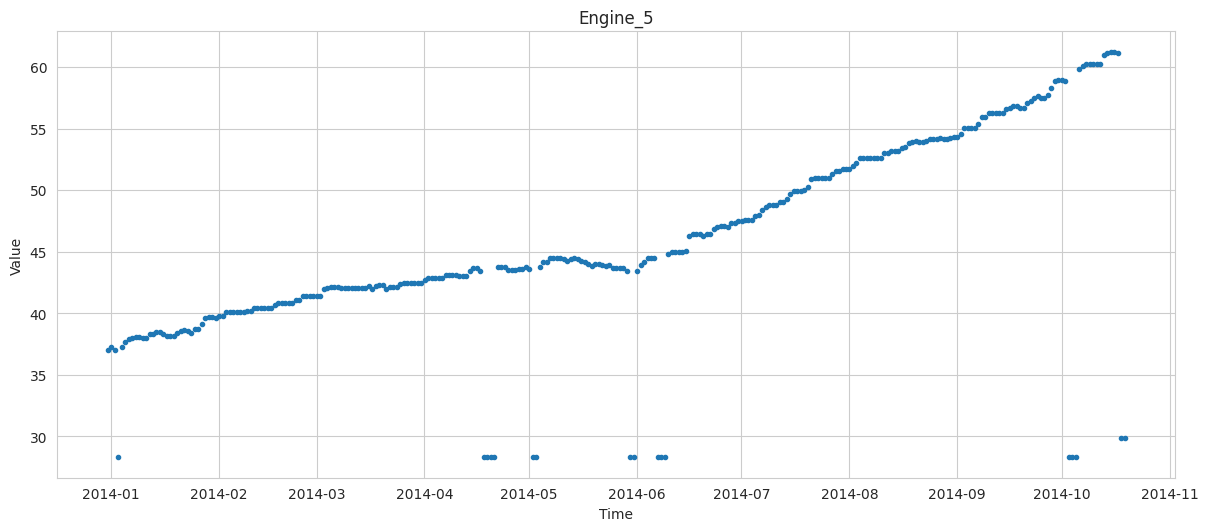

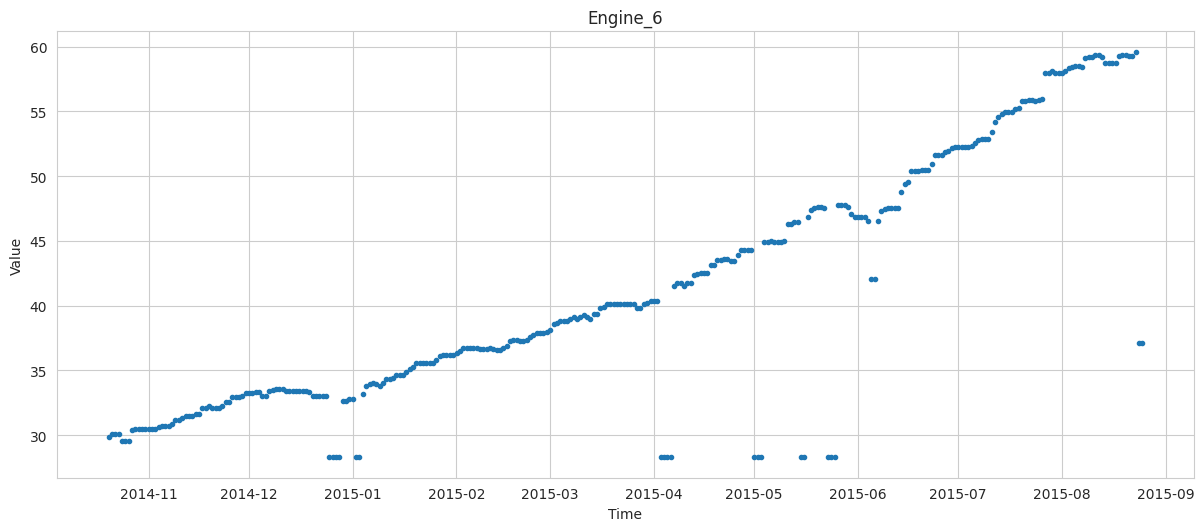

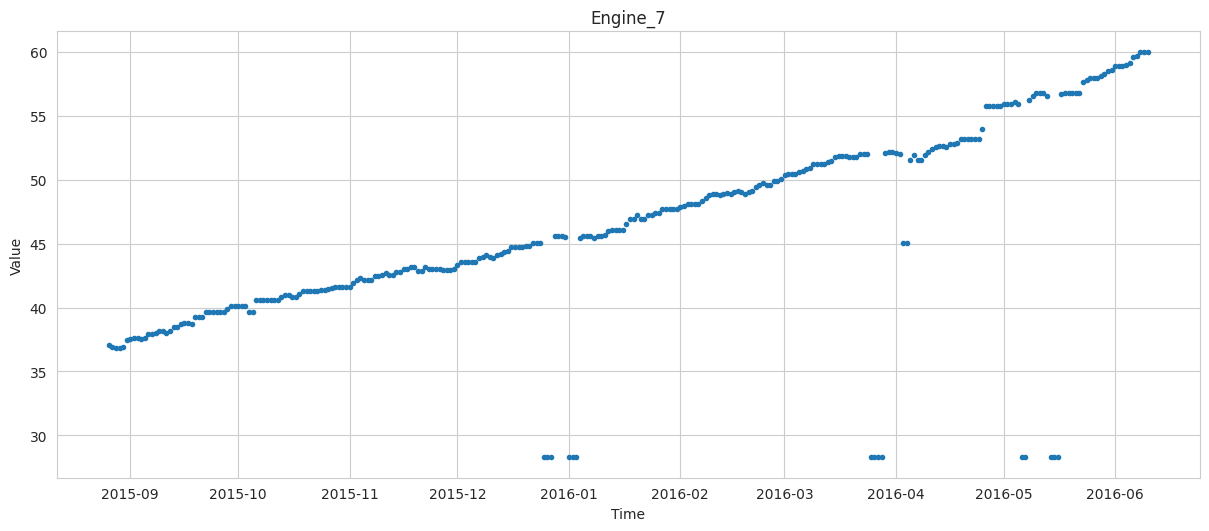

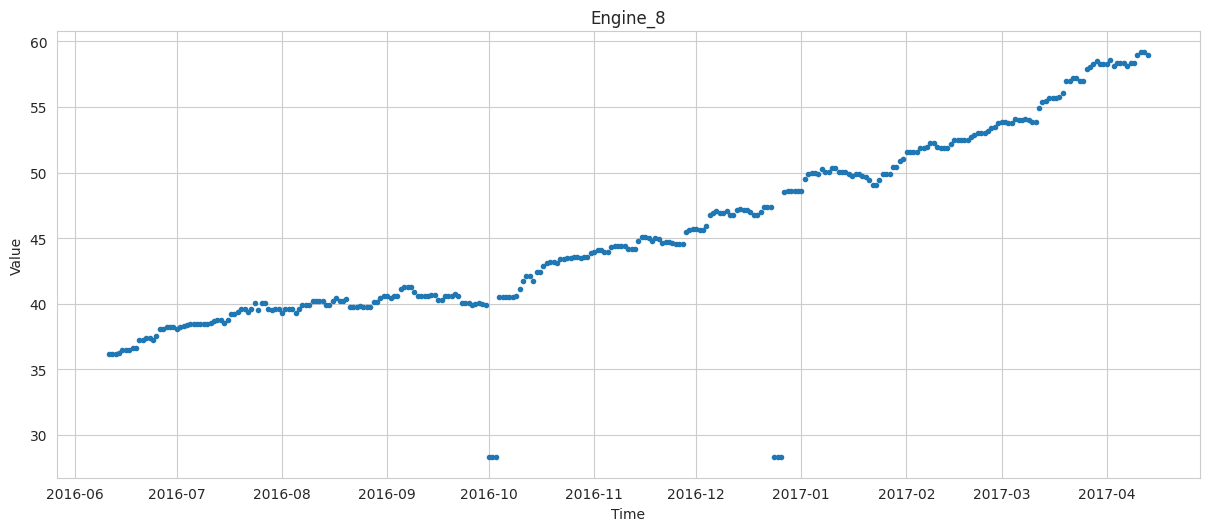

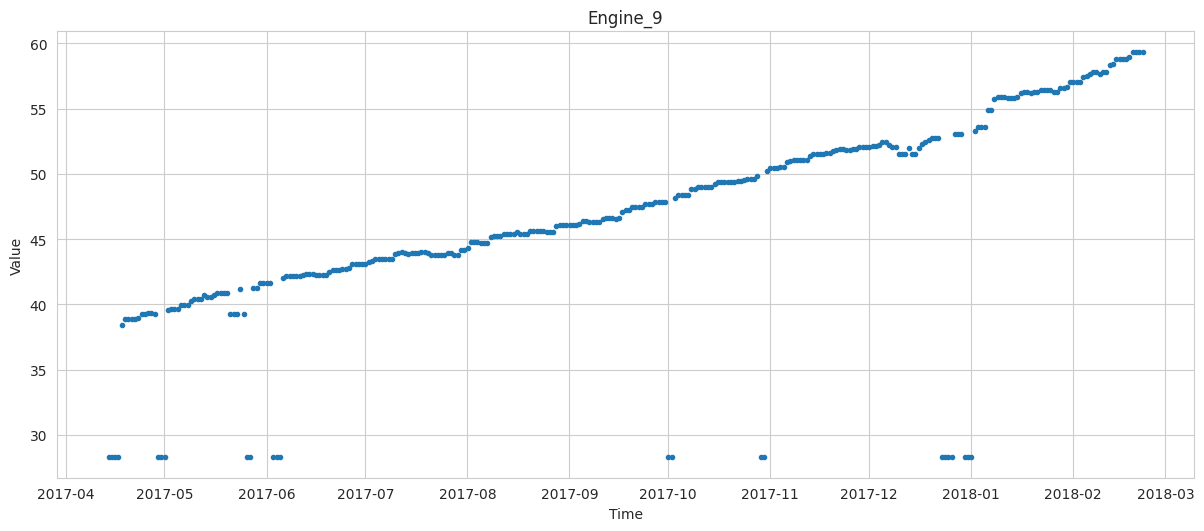

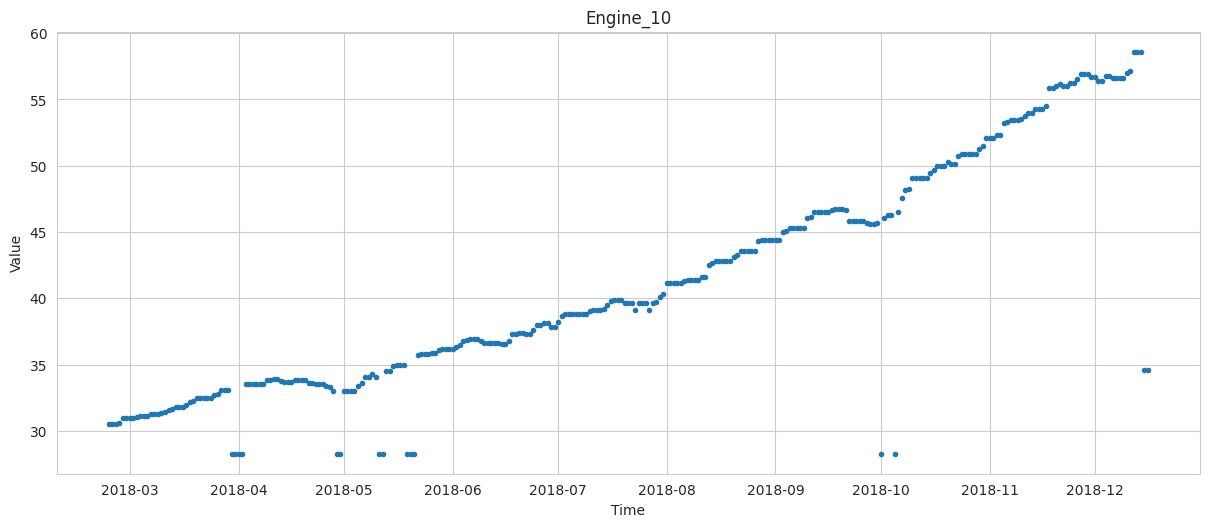

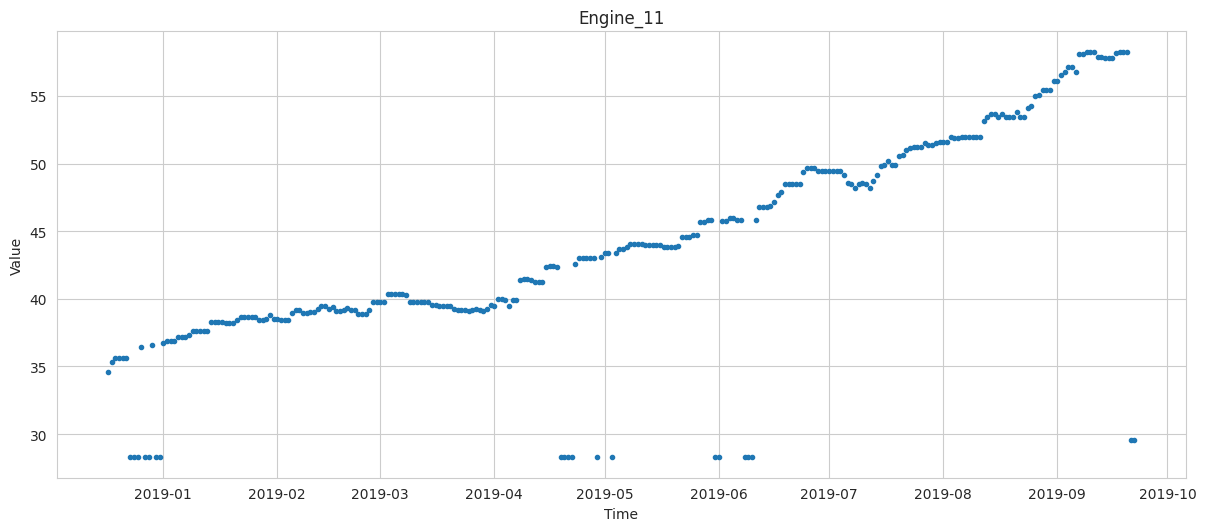

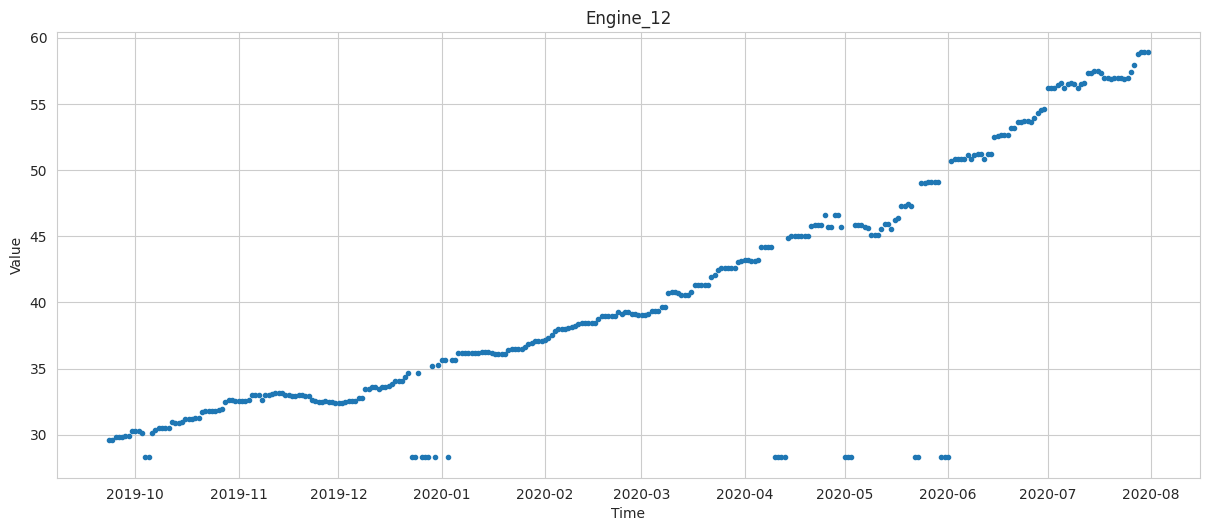

In [19]:
print('Plots after applying median filter')
for i in range(13):
    plt.figure(figsize=(12,5))
    plt.plot(df_daily[df_daily['engine_id']==i].index,df_daily[df_daily['engine_id']==i]['filtered_value'],'.',label = f'Engine_{i}')
    plt.tight_layout()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Engine_{i}')

In [20]:
df_daily.head()

,value,engine_id,filtered_value
timestamp,,,
2010-01-01 01:00:00,28.277262,0,28.277262
2010-01-02 01:00:00,28.277262,0,28.277262
2010-01-03 01:00:00,28.277262,0,28.277262
2010-01-04 01:00:00,32.644487,0,32.644487
2010-01-05 01:00:00,32.644487,0,32.644487


In [21]:
df_daily.drop('value',inplace = True,axis=1)

#### Creating dictionary containg each engine

In [22]:
engine_data={}
for i in range(14):
    engine_data[i] = df_daily[df_daily['engine_id']==i].drop('engine_id',axis=1)

In [23]:
start_date = engine_data[13].index[0]
engine_data[13]

,filtered_value
timestamp,
2020-08-01 01:00:00,37.191503
2020-08-02 01:00:00,37.191503
2020-08-03 01:00:00,37.191503
2020-08-04 01:00:00,37.423116
2020-08-05 01:00:00,37.444171
...,...
2020-12-01 01:00:00,45.192648
2020-12-02 01:00:00,45.234759
2020-12-03 01:00:00,45.192648


#### Looking at data of all engine on single plot

In [24]:
list_pp_engine = []
for i in range(13):
    engine_no = i
    engine = engine_data[engine_no]
    engine.reset_index(inplace=True)
    engine.drop('timestamp',inplace=True,axis=1)
    engine.index.name = 'No. of days'
    list_pp_engine.append(engine)

<Axes: ylabel='Count'>

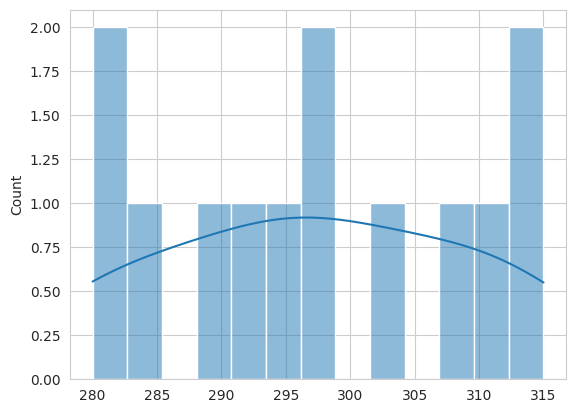

In [25]:
# To see distribution of the no. of days 
sns.histplot([engine.shape[0] for engine in list_pp_engine],kde=True,bins=13)

In [26]:
# Creating a single dataframe containing all the engines
new_df = pd.concat(list_pp_engine)

Text(0.5, 1.0, 'Value vs Days(All Engines) ')

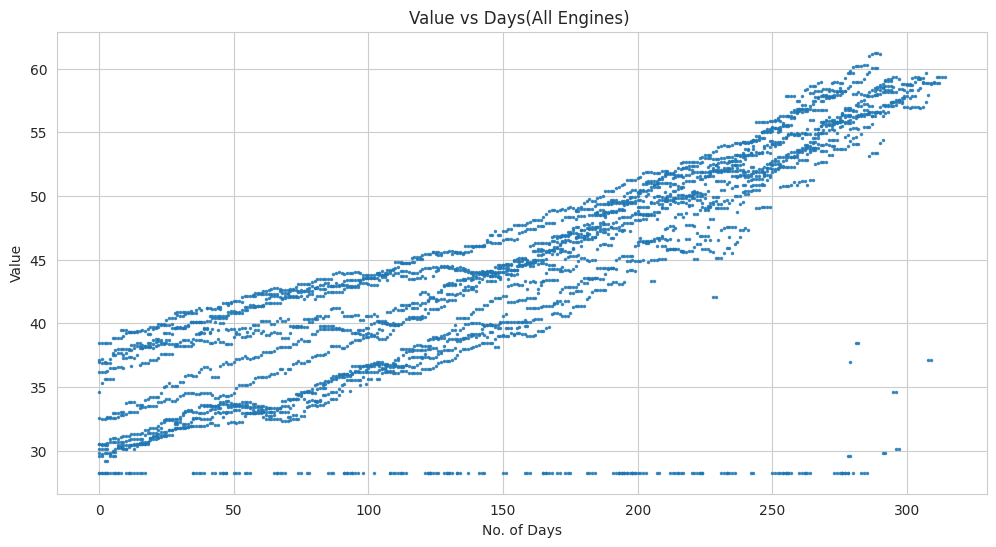

In [27]:
plt.figure(figsize=(12,6))
plt.plot(new_df['filtered_value'],'.',markersize=3,alpha=0.8)
plt.xlabel('No. of Days')
plt.ylabel('Value')
plt.title('Value vs Days(All Engines) ')

#### Using 3rd degree polynomial to fit the data(Purely on basis of Observation)

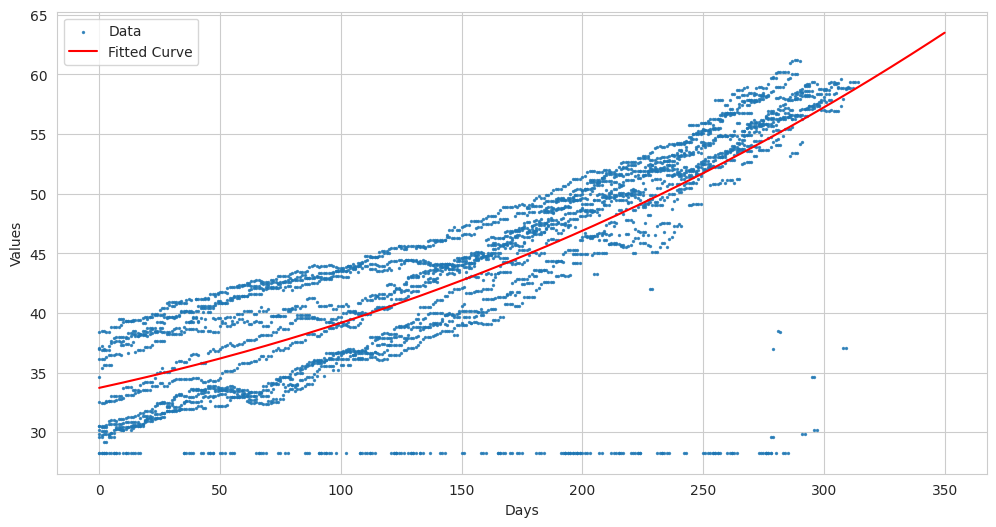

In [28]:
from scipy.optimize import curve_fit
df=new_df.copy()

x = df.index.values  # days
y = df['filtered_value'].values  # sensor values

# Defining the function to fit the data points 
def polynomial_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Fitting the curve to the data
params, covariance = curve_fit(polynomial_func, x, y)

# Getting the fitted parameters
a, b, c, d = params

# Creating a range of x values for plotting the curve
x_fit = np.linspace(min(x),350,350)

# Calculating the corresponding y values for the fitted curve
y_fit = polynomial_func(x_fit, a, b, c, d)

# Plot the original data and the fitted curve
plt.figure(figsize=(12,6))
plt.scatter(x, y, label='Data', s=2, alpha=0.8)
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend()
plt.show()

In [29]:
engine_13 = engine_data[13].copy()
engine_13.reset_index(inplace=True)
engine_13.drop('timestamp',inplace=True,axis=1)
engine_13.index.name = 'No. of Days'

#### We now know the profile that our current engine should follow

Text(0, 0.5, 'Value')

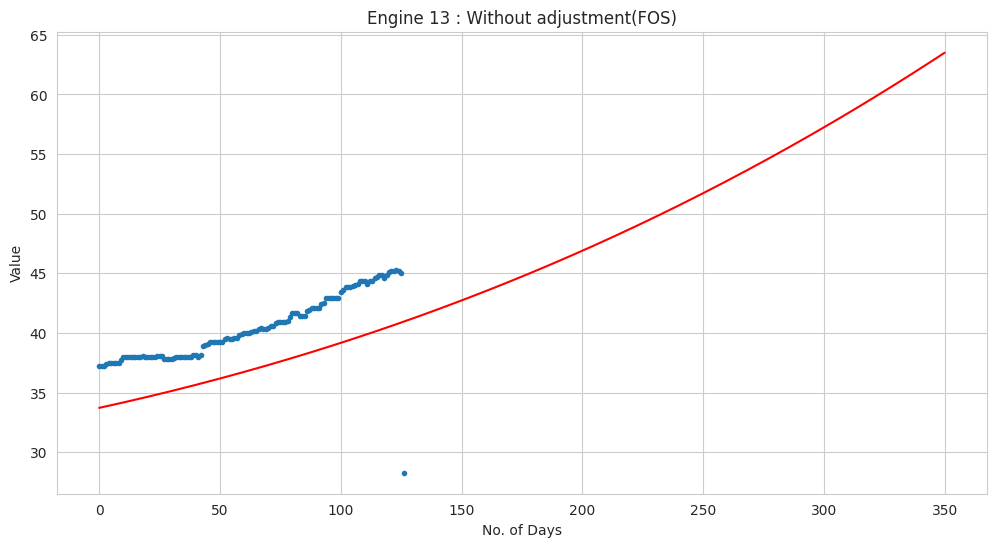

In [30]:
plt.figure(figsize=(12,6))
plt.title('Engine 13 : Without adjustment(FOS)')
plt.plot(engine_13['filtered_value'],'.')
plt.plot(x_fit, y_fit, label='Profile', color='red')
plt.xlabel('No. of Days')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

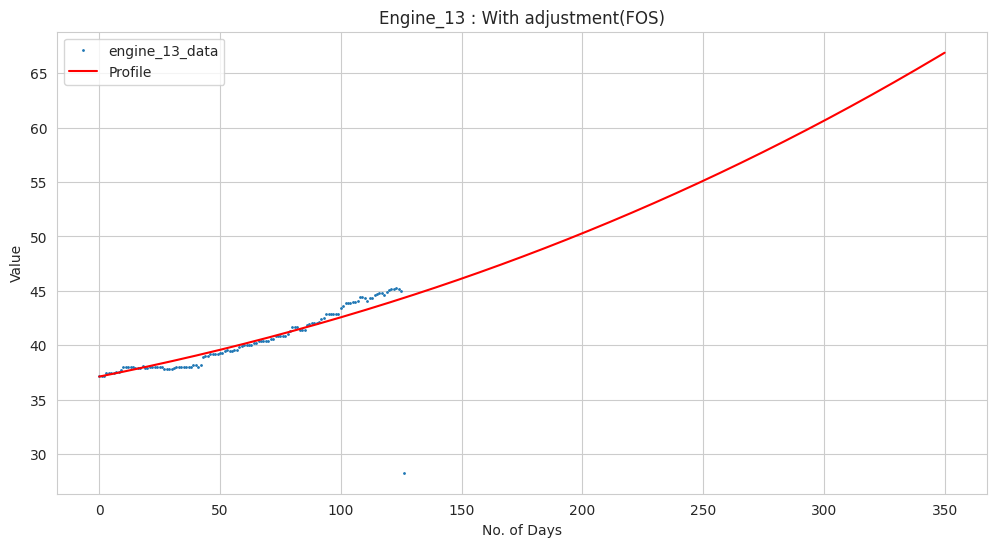

In [31]:
adjustment = 3.4 #FOS
plt.figure(figsize=(12,6))
plt.title('Engine_13 : With adjustment(FOS)')
plt.plot(engine_13['filtered_value'],'.',markersize=2,label='engine_13_data')
plt.plot(x_fit, y_fit+adjustment, label='Profile', color='red')
plt.legend()
plt.xlabel('No. of Days')
plt.ylabel('Value')

In [32]:
from scipy.optimize import fsolve

target_y = 61 # safety_thres

x_guess = 0.0  

x_solution = fsolve(lambda x: polynomial_func(x,a, b, c, d) - target_y + adjustment, x_guess)

print(f'When y = {target_y}, x = {int(x_solution[0])}')

When y = 61, x = 303


In [33]:
start_date+datetime.timedelta(days=int(x_solution[0]))

Timestamp('2021-05-31 01:00:00')

In [34]:
final_date = start_date + datetime.timedelta(days=int(x_solution[0])) #date when it reaches safety threshold

In [35]:
print(f'The current engine will reach safety threshold value of 61 on {final_date.date()}')
print(f'Approx days of operation before reaching threshold: {int(x_solution[0])}')

The current engine will reach safety threshold value of 61 on 2021-05-31
Approx days of operation before reaching threshold: 303


### The current engine will reach safety threshold value of 61 on 2021-05-31(Monday)
### Approx days of operation before reaching threshold: 303